# Introduction to Data Science, Lab 5 (10/14)
- Exploratory Data Analysis (EDA)
- Data profiling (manual and with ```pandas_profiling```)

The material in this notebook is based on the Responsible Data Science course taught by Julia Stoyanovich in Spring 2020

### *EDA and Data Profiling*

Explorative Data Analysis (EDA) refers to a systematic methods of analyzing data. EDA was coined in 1961 by John Tukey in an attempt to shift emphasis from statistical hypothesis testing to selecting useful data-inspired hypotheses to test with appropriate statistical tools.

Data Profiling is a subset of EDA that focuses on descriptive statistics of the dataset and assesin data quality before performing more sophisticated EDA. In this sense, data profiling can be viewed as a "pre-processing" stage to EDA. Some intra-column data profiling analysis includes specifying the ```length```, ```type```, ```uniqueness```, ```missingness``` of values. For numeric features, ```minimum```, ```maximum```, ```mean```, ```mode```, ```variation```, ```quantiles``` (for example, summarized in a box-plot).

### *Manual Profiling*

In [82]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
iris=load_iris()
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [84]:
# Understand diminsions:
print(data.shape)

(150, 5)


In [85]:
# Summary of target:
data['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

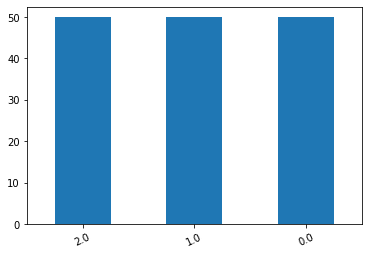

In [86]:
# View summary as histogram:
data['target'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [87]:
# Summary of "petal width (cm)":
data['petal width (cm)'].value_counts()

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
2.0     6
2.1     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width (cm), dtype: int64

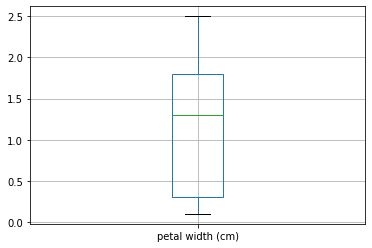

In [88]:
# Box-plot a numeric column:
data.boxplot(column='petal width (cm)')

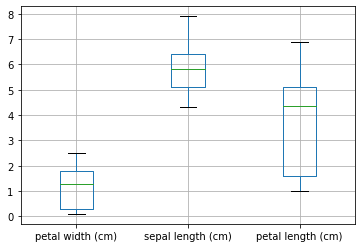

In [89]:
# Box-plot multiple numeric columns:
data.boxplot(column=['petal width (cm)','sepal length (cm)','petal length (cm)'])

In [90]:
# A pandas built-in for descriptive statistics:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [91]:
# What if we have non-numeric types?
data['text']=['lorem ipsum']*len(data)
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,text
0,5.1,3.5,1.4,0.2,0.0,lorem ipsum
1,4.9,3.0,1.4,0.2,0.0,lorem ipsum
2,4.7,3.2,1.3,0.2,0.0,lorem ipsum
3,4.6,3.1,1.5,0.2,0.0,lorem ipsum
4,5.0,3.6,1.4,0.2,0.0,lorem ipsum


In [92]:
display(data.describe())
data.drop("text",axis=1,inplace=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [93]:
# We've alredy seen these:
display(data.head(5))
display(data.tail(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [94]:
# We can also sample some rows randomly: 
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
21,5.1,3.7,1.5,0.4,0.0
132,6.4,2.8,5.6,2.2,2.0
101,5.8,2.7,5.1,1.9,2.0
114,5.8,2.8,5.1,2.4,2.0
24,4.8,3.4,1.9,0.2,0.0


In [95]:
# We saw this in Lab 1
print(data.columns)
print(data.index) 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
RangeIndex(start=0, stop=150, step=1)


In [96]:
# Rename columns:
new_cols=["sepal_length","sepal width","petal_length","petal_width","class"]
data=data.rename(columns={col:new_col for col,new_col in zip(data.columns,new_cols)})
data.columns

Index(['sepal_length', 'sepal width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [97]:
# Pandas query:
data.query('petal_length*1.1>sepal_length')

,sepal_length,sepal width,petal_length,petal_width,class
100,6.3,3.3,6.0,2.5,2.0
106,4.9,2.5,4.5,1.7,2.0
134,6.1,2.6,5.6,1.4,2.0


In [98]:
# An alternative method from Lab 2:
data[1.1*data['petal_length']>data['sepal_length']]

,sepal_length,sepal width,petal_length,petal_width,class
100,6.3,3.3,6.0,2.5,2.0
106,4.9,2.5,4.5,1.7,2.0
134,6.1,2.6,5.6,1.4,2.0


You’ll see that this hypothesis doesn’t hold. You get an empty DataFrame back as a result.

Note that this function can also be expressed as iris[iris.Petal_length > iris.Sepal_length]

In [99]:
# Check for missing values:
data.isnull().any()

sepal_length    False
sepal width     False
petal_length    False
petal_width     False
class           False
dtype: bool

#### *Handling missing data*
Dealing with missing data is, of course, data- and domain-specific. However, there are two common approaches:
- *Deletion:* sometimes missing values do not carry any significance; e.g., the dataset we downloaded from the internet had compatibility issues when saved as ```.csv``` in Excel, producing some extraneous rows with *NaNs*. Deleting rows or even columns with missing data in such cases is safe;
- *Imputation*: missing values sometimes do carry information and discarding them might bias the analysis (can you think of examples?). In such cases, missing data is often substituted with a column mean, mode, or median. In more sophisticated analyses, a missing value can be substituted with an extraplated value (e.g., predicted with k-NN based on other features). Additionally, it is sometimes effective to add a binary feature to the data indicating which values from a particular column were missing (no information loss).

In [100]:
data=pd.read_csv('property data.csv')
print(data.shape)
data

(9, 7)


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [101]:
# Note that .isnull() counts only NaNs:
data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [102]:
data=pd.read_csv('property data.csv',na_values=["na","--"])
data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64

To impute missing values properly, we need to understand types of variables (e.g., we cannot impute a missing value of a categorical variable with mean).

In [103]:
# Determine types of variables:
for col in data.columns:
    print(f'{col}: {data.loc[:,col].apply(lambda x: type (x)).unique()}')

PID: [<class 'float'>]
ST_NUM: [<class 'float'>]
ST_NAME: [<class 'str'>]
OWN_OCCUPIED: [<class 'str'> <class 'float'>]
NUM_BEDROOMS: [<class 'float'>]
NUM_BATH: [<class 'str'> <class 'float'>]
SQ_FT: [<class 'float'>]


In [104]:
# Add a feature indicating a missing value in 'SQ_FT':
data['SQ_FT MV']=data['SQ_FT'].isnull()
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,SQ_FT MV
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,False
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,True
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,False
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0,False
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,False
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,False
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,False
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN,True
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,False


In [105]:
# Imputate missing values in 'SQ_FT' with mean:
mean=np.mean(data['SQ_FT'])
data['SQ_FT'].fillna(mean,inplace=True)
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,SQ_FT MV
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,False
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0,True
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,False
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0,False
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,False
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,False
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,False
7,100008000.0,213.0,TREMONT,Y,1.0,1,1100.0,True
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,False


In [106]:
# Pandas also provides linear interplotation:
data['PID'].interpolate(inplace=True)
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,SQ_FT MV
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,False
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0,True
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,False
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0,False
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0,False
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,False
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,False
7,100008000.0,213.0,TREMONT,Y,1.0,1,1100.0,True
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,False


In [107]:
iris=load_iris()
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])

In [108]:
# Pearson correlation:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [109]:
# Pearson correlation visualized:
corr=data.corr()
corr.style.background_gradient(cmap='bwr')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### *Pandas Profiling Library*

Pandas delivers a ```pandas_profiling``` library that automatically generates reports from a pandas DataFrame.
For each column in the DataFrame, ```panas_profiling``` reports the following statistics (when applicable):

- Overview (type,unique values,missing values, etc.);
- Descriptive statistics (range, quantiles, etc.)
- Histograms and correlation matrices


In [110]:
import pandas_profiling
data=pd.read_csv("Meteorite_Landings.csv",encoding='UTF-8')
print(data.shape)
data.head(5)

(45716, 10)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,"107,000",Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,"1,914",Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
pandas_profiling.ProfileReport(data)

In [ ]:
# Save report:
ppf=pandas_profiling.ProfileReport(data)
ppf.to_file("pandas-profiling.html")

### *Mask Analysis*

The mask analysis (string pattern analysis) discovers the structure of values symbol-by-symbol. Symbols ar partitioned into and encoded as
- lower case letter: 'l';
- capital case letter: 'L'
- digit: 'D'
- space: 's'
- missing value: '-null-'

Special characters (all other symbold, e.g. ?!^#@) are left uncoded. Examples of mask analysis:
- 'Van' returns 'Lll'
- 'VAN' returns 'LLL'
- 'Van BC' returns 'LllsLL'
- '+1 123-1234-5555 returns '+DsDDD-DDDD-DDDD'

In [ ]:
data=pd.read_csv('2017business_licences.csv')
print(data.shape)
print(data.columns)
data.head(5)

In [ ]:
# Mask analysis:
def getMask(field):
    mask=''
    if str(field)=='nan':
        mask='-null-'
    else:    
        for character in str(field):
            if 65<=ord(character)<=90: # ascii 65 to 90 are capital letters;
                mask+='L'                
            elif 97<=ord(character)<=122: # ascii 97 to 122 are lower case letters;
                mask+='l'
            elif 48<=ord(character)<=57: # ascii 48 to 57 are digits.
                mask+='D'
            elif ord(character)==32:
                mask+='s'
            else:
                mask=mask+character
    return mask

def mask_profile(series):    
    value=series.apply(getMask).value_counts()
    percentage=round(series.apply(getMask).value_counts(normalize=True)*100,2)
    result=pd.DataFrame(value)
    result['%']=pd.DataFrame(percentage)
    result.columns=['Count','%']
    return result

In [ ]:
mask_profile(data['LicenceNumber']).head(5)

In [ ]:
mask_profile(data['House']).head(5)

In [ ]:
mask_profile(data['PostalCode']).head(5)